# LSN Exercise 1

The aim of this first exercise is to review some important **elements of statistical theory**, such as:
- The extimation of uncertainties;
- The use of likelihood tests;
- The CLT (*Central Limit Theorem*);

We will also perform our first Monte Carlo simulation: the *Buffon's experiment*.

In [48]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Input functions:

def Read(filename):
    with open(filename) as f:
        vector = [float(i) for i in f.read().splitlines()]
    return vector

## 1.1 Statistical uncertainties

We are going to test a random number generator (that is, *how much* the *pseudo-random* numbers generated are close to real random numbers) by extimating the *first two cumulants* of the uniform distribution implemented by our generator and comparing them with the theoretical one:

$$ c_1\equiv m_1\equiv \langle r \rangle \equiv \int_\Omega r\; \mathrm{d}r = \frac{1}{2} \qquad c_2\equiv m_2 - m_1^2\equiv\sigma_r^2\equiv \int_\Omega (r - \langle r \rangle)^2 \; \mathrm{d}r = \frac{1}{12} \approx 0,083 $$

if $ r \sim \mathscr U(0,1) $, so that $ \Omega = \mathbb R $ and $ \mathcal P(r) = 0 $ if $ r\notin [0,1) $ ,    $ \mathcal P(r) = 1 $ if $ r\in [0,1) $. To do this we look at running our generator as an experiment of rolling a "dice": if the dice is not loaded we expect that, after a large number of throws, the average of the results should be close to the expected value and will tend to become closer to the expected value as more trials are performed (this is the so called *law of large numbers*). To extimate uncertainties we make use of the *blocking method*, very useful when performing Monte Carlo simulations: instead of "throwing the dice" $ N = 10000 $ times, we throw it $ s = 100 $ times for $ n = 100 $ times, that is we *block* our simulation in $n$ experiment of length $s$ ($ N = ns $). ETC


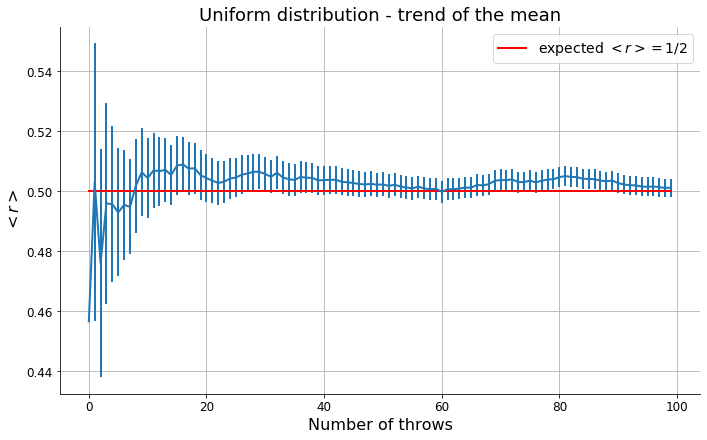

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# We used n_step = 100 throws for each  block and n_cell = 100

Means = Read("Unif/Mean.txt")
Errors = Read("Unif/Mean_error.txt")

t = np.arange(len(Means))
expected = [0.5 for i in t]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Uniform distribution - trend of the mean")
plt.xlabel("Number of throws")
plt.ylabel("$ <r> $")
plt.plot(t, expected,'r',label="expected $ <r>=1/2 $")
plt.legend()
plt.grid(True)

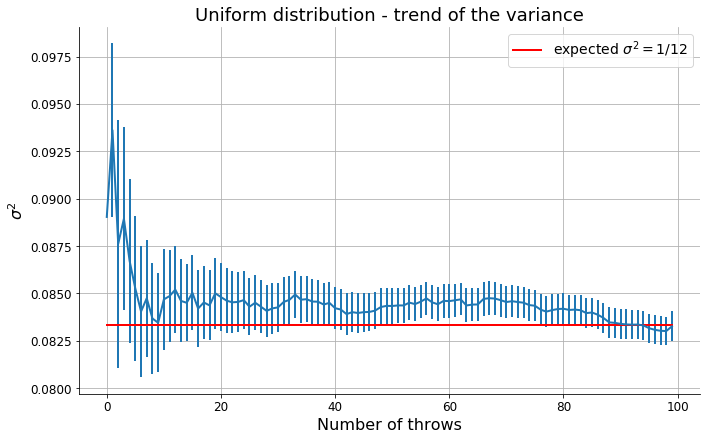

In [50]:
Means = Read("Unif/Var.txt")
Errors = Read("Unif/Var_error.txt")

expected = [1/12 for i in t]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(t, Means, yerr=Errors)
plt.title("Uniform distribution - trend of the variance")
plt.xlabel("Number of throws")
plt.ylabel("$ \sigma^2 $")
plt.plot(t, expected, 'r', label="expected $ \sigma^2 = 1/12 $")
plt.legend()
plt.grid(True)

Chi quadro

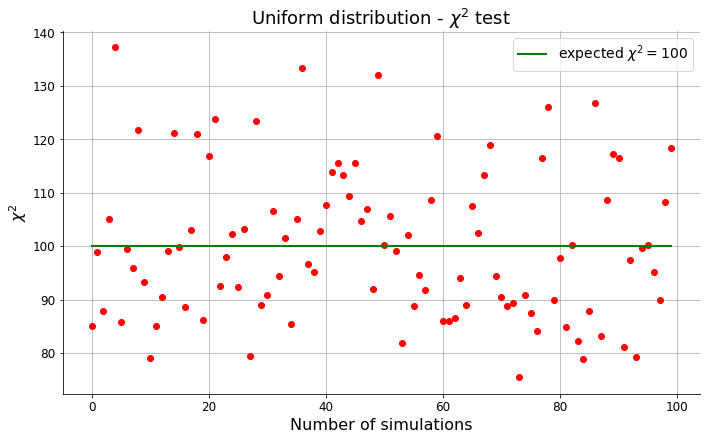

In [51]:
Chi2 = Read("Unif/Chi2.txt")

x = [int(i) for i in range(len(Chi2))]
expected = [100 for i in x]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.plot(x, Chi2, "ro")
plt.title("Uniform distribution - $\chi^2$ test")
plt.xlabel("Number of simulations")
plt.ylabel("$ \chi^2 $")
plt.plot(x, expected, 'g', label="expected $ \chi^2 = 100 $")
plt.legend()
plt.grid(True)

## 1.2 Central Limit Theorem (CLT)

The best values for the continuous normal pdf which best fit the datas (up to order 4) with N = 100 are:
mean =  0.0008
stdev =  0.1


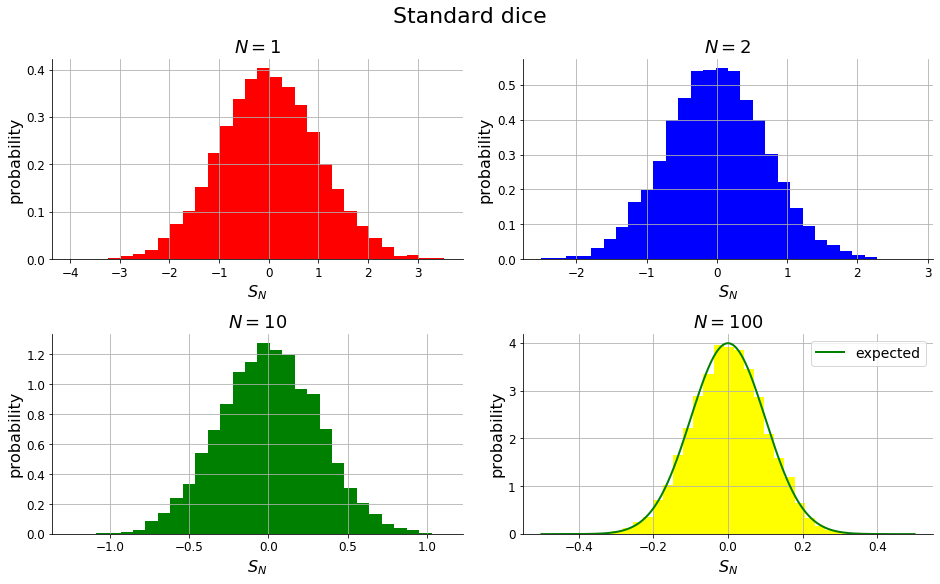

In [59]:
Gauss1 = Read("Dice/Gauss_1.txt")
Gauss2 = Read("Dice/Gauss_2.txt")
Gauss3 = Read("Dice/Gauss_3.txt")
Gauss4 = Read("Dice/Gauss_4.txt")

SCALE = 8
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

n_bin = 30

fig, ((G1, G2), (G3, G4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Standard dice", fontsize=22)

G1.hist(Gauss1, n_bin, density=True, facecolor='red')
G1.set_title("$ N = 1 $")

G2.hist(Gauss2, n_bin, density=True, facecolor='blue')
G2.set_title("$ N = 2 $")

G3.hist(Gauss3, n_bin, density=True, facecolor='green')
G3.set_title("$ N = 10 $")

def Gauss(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2))

(mu, sigma) = stat.norm.fit(Gauss4)     # Normal fit parameters
print("The best values for the continuous normal pdf which best fit the datas (up to order 4) with N = 100 are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))

x = np.linspace(-0.5,0.5,10000)
Expected = [Gauss(i,0,1/10) for i in x]       # I expect a normal pdf of center 0 and variance 1/sqrt(100)

G4.hist(Gauss4, n_bin, density=True, facecolor='yellow')
G4.plot(x, Expected, "green", label='expected')
G4.set_title("$ N = 100 $")
G4.legend()

for i in fig.get_axes():
    i.set_xlabel("$S_N$")
    i.set_ylabel("probability")
    i.grid(True)

The best values for the continuous normal pdf which best fit the datas (up to order 4) with N = 100 are:
mean =  0.999
stdev =  0.0993


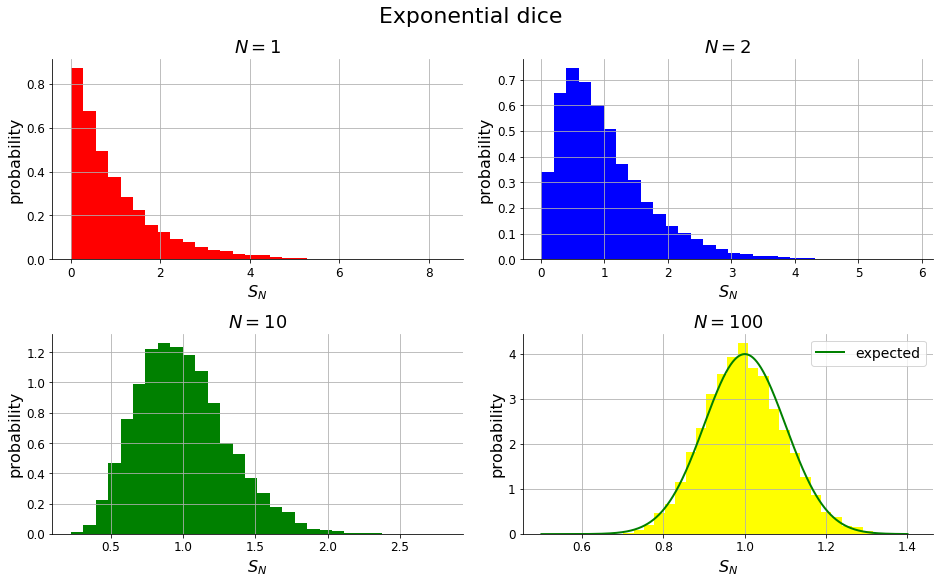

In [55]:
Exp1 = Read("Dice/Exp_1.txt")
Exp2 = Read("Dice/Exp_2.txt")
Exp3 = Read("Dice/Exp_3.txt")
Exp4 = Read("Dice/Exp_4.txt")

fig, ((E1, E2), (E3, E4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Exponential dice", fontsize=22)

E1.hist(Exp1, n_bin, density=True, facecolor='red')
E1.set_title("$ N = 1 $")

E2.hist(Exp2, n_bin, density=True, facecolor='blue')
E2.set_title("$ N = 2 $")

E3.hist(Exp3, n_bin, density=True, facecolor='green')
E3.set_title("$ N = 10 $")

(mu, sigma) = stat.norm.fit(Exp4)     # Normal fit parameters
print("The best values for the continuous normal pdf which best fit the datas (up to order 4) with N = 100 are:")
print("mean = ", round(mu,4))
print("stdev = ", round(sigma,4))

x = np.linspace(0.5,1.4,10000)
Expected = [Gauss(i,1,1/10) for i in x]      # I expect a normal pdf of center 0 and variance 1/sqrt(100)

E4.hist(Exp4, n_bin, density=True, facecolor='yellow')
E4.plot(x, Expected, "green", label='expected')
E4.set_title("$ N = 100 $")
E4.legend()

for i in fig.get_axes():
    i.set_xlabel("$ S_N $")
    i.set_ylabel("probability")
    i.grid(True)

The best values for the continuos Cauchy-Lorentz pdf which best fit the datas (up to order 4) with N = 100 are:
center =  -0.0012
scale =  1.0273


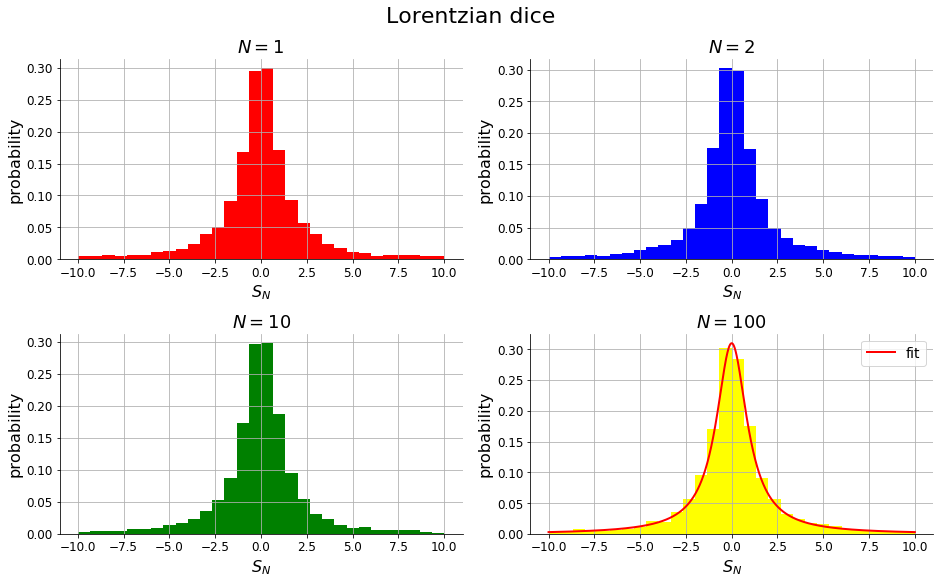

In [58]:
# The extreme values that dominate the Cauchy distribution make it the prototypical heavy-tailed distribution. 
# Informally, a distribution is often described as having heavy or “fat” tails if the probability of events in
# the tails of the distribution are greater than what would be given by a Normal distribution.

Lorentz1 = Read("Dice/Lorentz_1.txt")
Lorentz2 = Read("Dice/Lorentz_2.txt")
Lorentz3 = Read("Dice/Lorentz_3.txt")
Lorentz4 = Read("Dice/Lorentz_4.txt")

fig, ((L1, L2), (L3, L4)) = plt.subplots(2, 2, constrained_layout=True, figsize=FIG_SIZE)
fig.suptitle("Lorentzian dice", fontsize=22)

# I reject all datas outside the interval [-10,10] (arbitrary choice)

L1.hist(Lorentz1, n_bin, density=True, facecolor='red', range=(-10,10))
L1.set_title("$ N = 1 $")

L2.hist(Lorentz2, n_bin, density=True, facecolor='blue', range=(-10,10))
L2.set_title("$ N = 2 $")

L3.hist(Lorentz3, n_bin, density=True, facecolor='green', range=(-10,10))
L3.set_title("$ N = 10 $")

def Lorentz(x, center, scale):
    return scale/(np.pi*(((x-center)**2)+scale**2))

(center, scale) = stat.cauchy.fit(Lorentz4)     # Cauchy fit parameters
print("The best values for the continuos Cauchy-Lorentz pdf which best fit the datas (up to order 4) with N = 100 are:")
print("center = ", round(center,4))
print("scale = ", round(scale,4))

x = np.linspace(-10,10,len(Lorentz4))

fit = [Lorentz(i,center,scale) for i in x]       # Cauchy fit

L4.hist(Lorentz4, n_bin, density=True, facecolor='yellow', range=(-10,10))
L4.plot(x, fit, "red", label='fit')
L4.set_title("$ N = 100 $")
L4.legend()

for i in fig.get_axes():
    i.set_xlabel("$ S_N $")
    i.set_ylabel("probability")
    i.grid(True)

## 1.3 Buffon's experiment

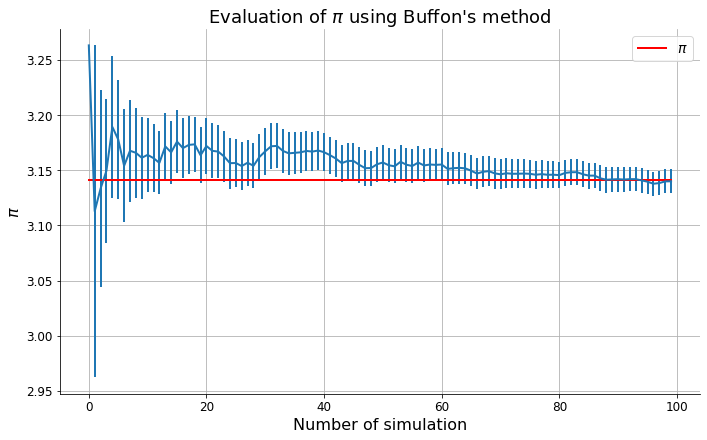

In [61]:
# We used n_step = 1000 throws for each  block and n_cell = 100

Pi = Read("Pi/Pi.txt")
Pi_err = Read("Pi/Pi_error.txt")

SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

x = np.arange(len(Pi))
expected = [np.pi for i in x]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(x, Pi, yerr=Pi_err)
plt.title("Evaluation of $\pi$ using Buffon's method")
plt.xlabel("Number of simulation")
plt.ylabel("$ \pi $")
plt.plot(x, expected,'r',label="$ \pi $")
plt.legend()
plt.grid(True)